# Task : 2 Titanic Classification
### Make a system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio-economic status, age, gender and more.


## Importing libraries

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Importing Dataset

In [135]:
Titanic_data= pd.read_csv("C:/Users/0863a/OneDrive/Desktop/Data analyst/bharat_intern/tested.csv")

In [95]:
## checking for first 5 rows in data set
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [96]:
## checking for the shape of data.
Titanic_data.shape

(418, 12)

In [97]:
## checking for the differnt 0 and 1 value in embarked
Titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [98]:
# getting some informations about the data
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [99]:
# check the number of missing values in each column
Titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [100]:
# drop the "Cabin" column from the dataframe
Titanic_data = Titanic_data.drop(columns='Cabin', axis=1)

In [101]:
# replacing the missing values in "Age" column with mean value
Titanic_data['Age'].fillna(Titanic_data['Age'].mean(), inplace=True)

In [102]:
## dropping the missing values
Titanic_data.dropna(inplace=True)

In [103]:
## see we have removed all the missing and irrelevant columns in dataset
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [104]:
# getting some statistical measures about the data
Titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,0.364508,2.263789,30.200103,0.448441,0.393285,35.627188
std,120.923774,0.481870,0.842077,12.562386,0.897568,0.982419,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.000000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1101.000000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1205.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [105]:
# finding the number of people survived and not survived
Titanic_data['Survived'].value_counts()

0    265
1    152
Name: Survived, dtype: int64

In [106]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

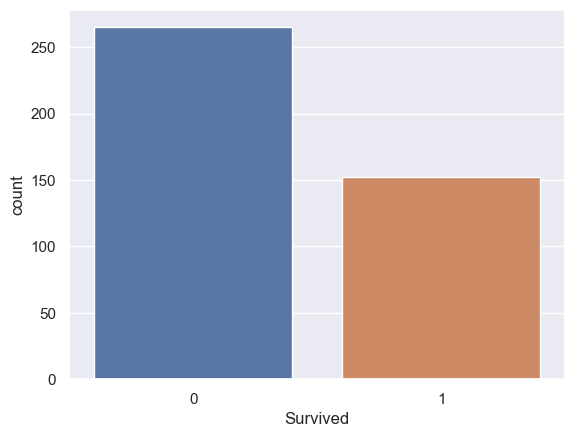

In [107]:
## we can see the no of suvived and not survived through graphs
sns.countplot(x='Survived', data= Titanic_data)

In [108]:
## value counts of male and female
Titanic_data['Sex'].value_counts()

male      265
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

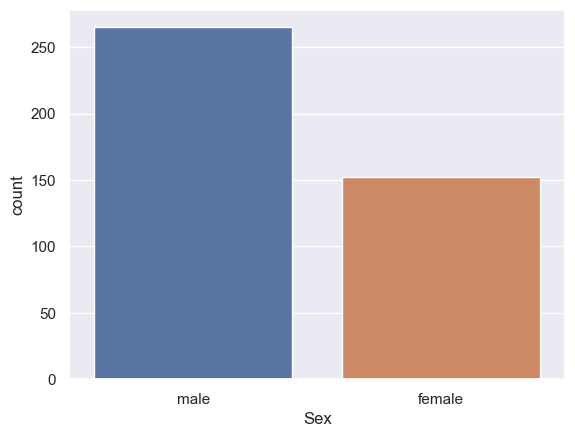

In [109]:
# making a count plot for "Sex" column
sns.countplot(x='Sex', data=Titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

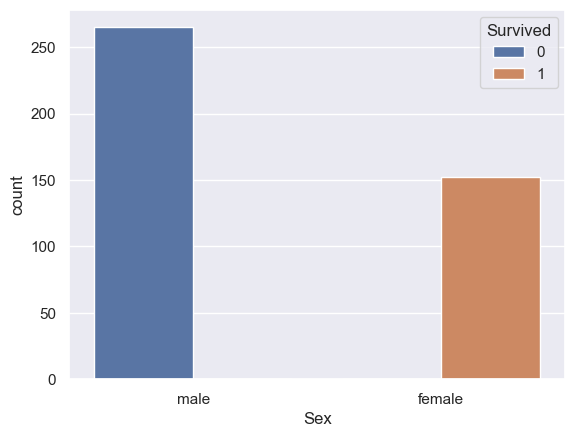

In [110]:
# number of survivors Gender wise
sns.countplot(x='Sex', hue='Survived', data=Titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

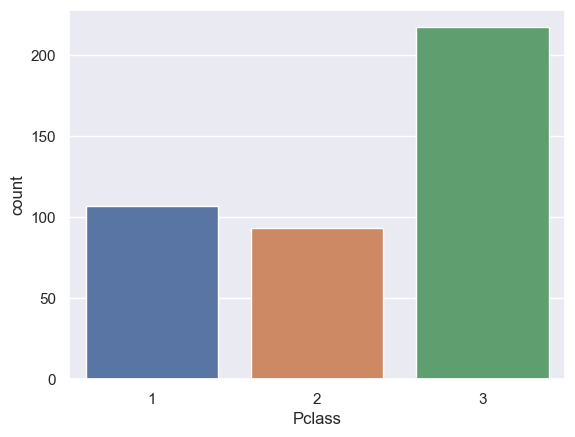

In [111]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=Titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

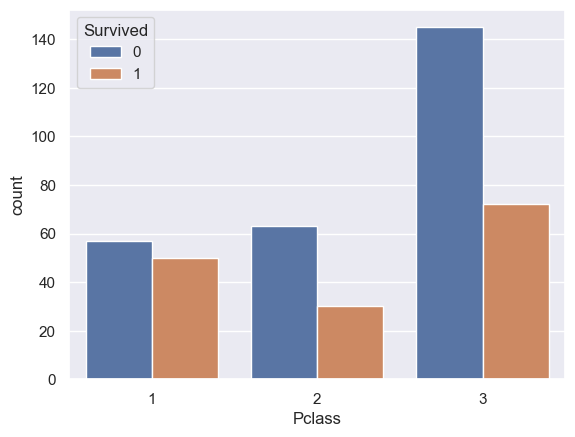

In [112]:
## combined survived and pclass. 
sns.countplot(x='Pclass', hue='Survived', data=Titanic_data)

In [113]:
# converting categorical Columns

Titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [114]:
## we have converted the categorical values in numerical
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [115]:
## splitting the dataset 
X = Titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = Titanic_data['Survived']

In [116]:
## training the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [117]:
## checking for the size of train and test.
print(X.shape, X_train.shape, X_test.shape)

(417, 7) (333, 7) (84, 7)


## Logistic Regression 

In [118]:
model = LogisticRegression()

In [119]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

C:\Users\0863a\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [121]:
print(X_train_prediction)

[0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1
 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1
 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0
 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1]


In [122]:
## accuracy of logistic training model.
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [123]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [124]:
print(X_test_prediction)

[0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0]


In [125]:
## accuracy on testing model
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0


## prediction of our model through Logistic Regression

In [141]:
predictedoutcome = model.predict([[3,0,34.5,0,0,7.8292,2]])
print(predictedoutcome)

[0]


C:\Users\0863a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Applying Random Forest Classifier

In [126]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [127]:
## acuracy of random forest
print(acc_random_forest)

100.0


## Prediction of our model through Random Forest Classifier

In [143]:
predictedoutcome =random_forest.predict([[3,0,34.5,0,0,7.8292,2]])
print(predictedoutcome)

[0]


C:\Users\0863a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Applying KNN

In [131]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train) 
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [132]:
## accurac of knn
print(acc_knn)

85.29


## Prediction of our model through Knn

In [144]:
predictedoutcome = knn.predict([[3,0,34.5,0,0,7.8292,2]])
print(predictedoutcome)

[0]


C:\Users\0863a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Applying Perceptron

In [136]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

C:\Users\0863a\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [137]:
print(acc_perceptron)

63.96


## Prediction of our model through Perceptron

In [145]:
predictedoutcome = perceptron.predict([[3,0,34.5,0,0,7.8292,2]])
print(predictedoutcome)

[0]


C:\Users\0863a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


## Applying Gaussian Naive Bayes

In [138]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [139]:
print(acc_gaussian)

100.0


## Predicting our model through Gausssian Naive Bayes Classifier  

In [146]:
predictedoutcome = gaussian.predict([[3,0,34.5,0,0,7.8292,2]])
print(predictedoutcome)

[0]


C:\Users\0863a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
